# Ornstein Uhlenbeck Neural Mass model : 

In [5]:
# Classic librairies importation
# -------------------------
import matplotlib.pyplot as plt
from jax import random  
import jax.numpy as jnp
import matplotlib.pyplot as plt
from vbjax.loops import make_sde
from vbjax import randn

# Model importation
# -------------------------
from OU_model import OU, OU_defaut_param
model = OU(OU_defaut_param)

In [6]:
# Simulation parameters definition
# -------------------------

key = random.PRNGKey(0) # Pseudo random number generator

dur = 30
dt = 0.01
time = jnp.arange(0, dur, dt)
x_init = jnp.zeros(2, dtype=complex) #x_init = randn(2, key = key) # For a random initial postion
ts = randn(int(dur/dt),*x_init.shape, key=key)

In [7]:
# Numerical stochastic differential equations integration using vbjax librairy 

_, loops = make_sde(dt, OU.drift_OU, OU.diffusion_OU)
result_model = loops(x_init, ts, OU_defaut_param)

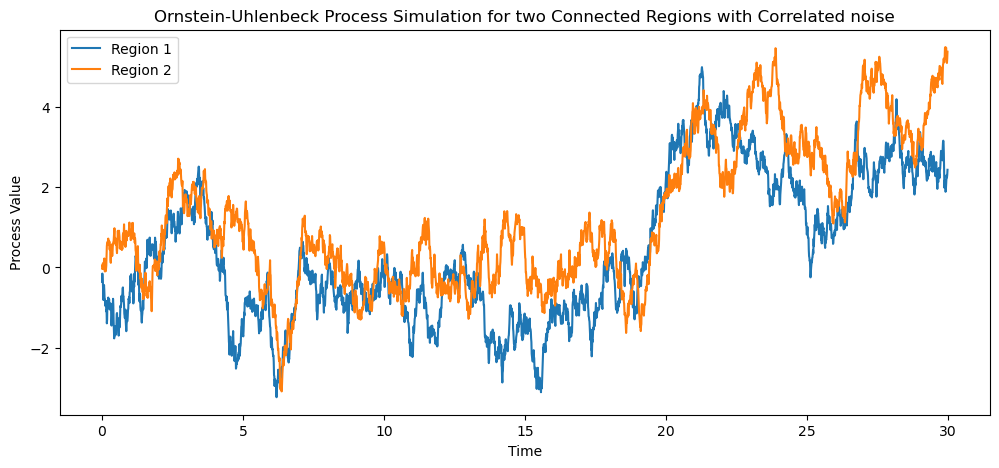

In [8]:
# Graphical representation
# -------------------------

plt.figure(figsize = (12,5))
plt.plot(time, result_model[:,0], label = "Region 1")
plt.plot(time, result_model[:,1], label = "Region 2")
plt.xlabel('Time')
plt.ylabel('Process Value')
plt.title('Ornstein-Uhlenbeck Process Simulation for two Connected Regions with Correlated noise')
plt.legend()
plt.show()